<a href="https://colab.research.google.com/github/Laxmikurapati/Quora-Question-Similarity-/blob/main/Quora_Questoin_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **1.Importing libraries**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gensim
# from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
from tqdm import tqdm_notebook
from nltk import word_tokenize
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning Projects/train (1).csv/train.csv',nrows=80000)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

0    50198
1    29802
Name: is_duplicate, dtype: int64
0    62.7475
1    37.2525
Name: is_duplicate, dtype: float64


<Axes: >

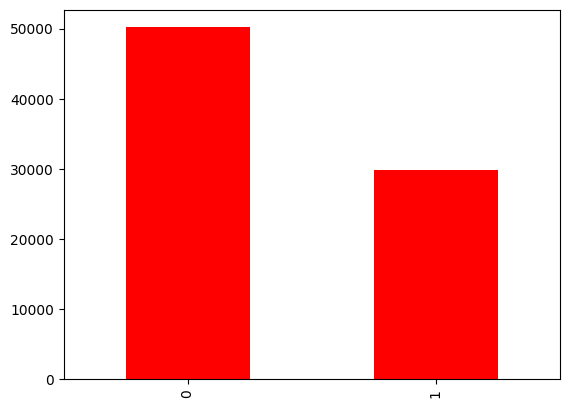

In [ ]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar',color='red')

In [ ]:
# Repeated questions creating one dimensional array
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
#printing series of unique qid
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 136101
Number of questions getting repeated 14349


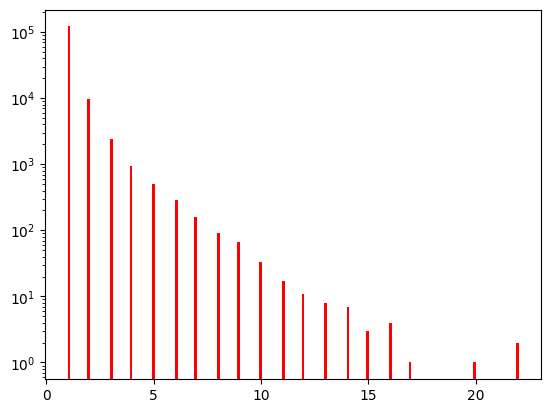

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160,color='red')
plt.yscale('log')
plt.show()

# **2.Basic Feature Engineering**
1)Length of question

2)Total number of words

3)Total number of common words

4)Tota words in all

5)Word share ratio ( total common words / Total words in both)



In [ ]:
#length of question
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
#total number of words
df['q1_num_words'] =df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [ ]:

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    #finding intersection of two set of words
    return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


# **3.Feature Analysis**

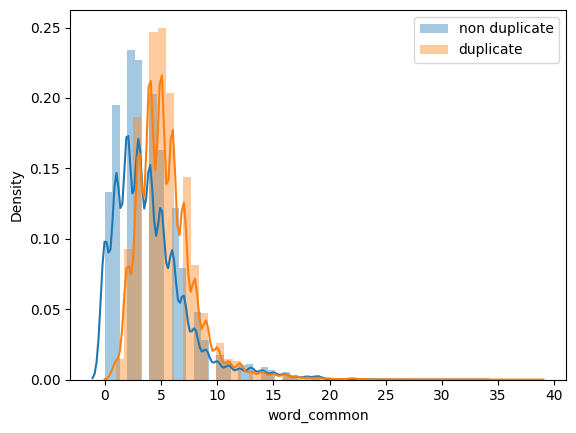

In [ ]:
#Common words

sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

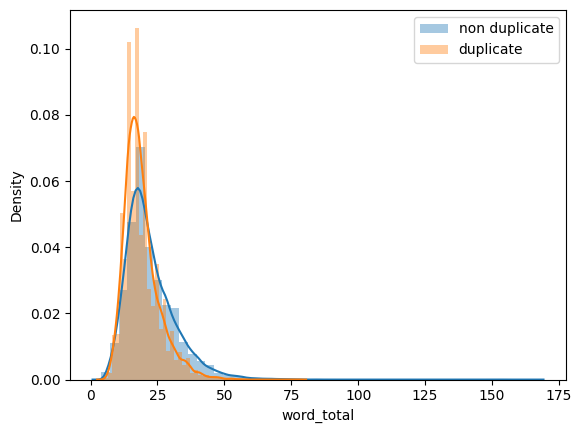

In [ ]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

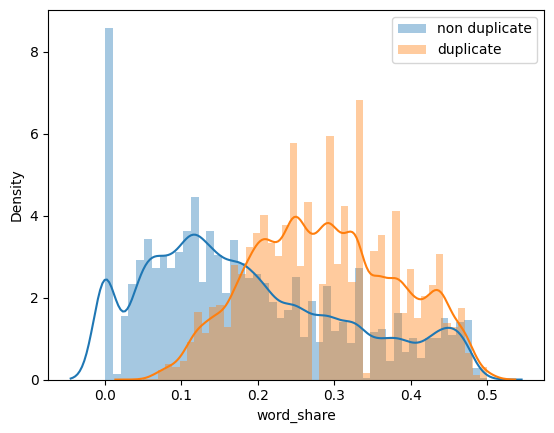

In [ ]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

From above visuals we can say interpret the following


1)If number of common words are less the 4 there are high chance that question are not duplicate or else there are duplicate

2)If total number of words are more then 25 there are more chances of that question not to be duplicate

3)If the total word share value is greater then 0.2 then high chnaces of being duplicate


In [ ]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [ ]:
final_df =df.drop(columns=['id','qid1','qid2','question1','question2'])

print(final_df.shape)
final_df.head()

(80000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,66,57,14,12,10,23,0.43
1,0,51,88,8,13,4,20,0.20
2,0,73,59,14,10,4,24,0.17
3,0,50,65,11,9,0,19,0.00
4,0,76,39,13,7,2,20,0.10


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=100)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(80000, 200)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(80000, 208)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,90,91,92,93,94,95,96,97,98,99
0,0,66,57,14,12,10,23,0.43,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.20,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,73,59,14,10,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.10,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.76275


# **4.Advanced Text preprocessing**

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy

## **Text preprocessing**

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
new_df =df.drop(columns=['id','qid1','qid2'])

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [ ]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,51,88,8,13,4,20,0.20
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,50,65,11,9,0,19,0.00
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,76,39,13,7,2,20,0.10


## **i.Token Features**

In [ ]:
# Advanced Features
!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
token_features = new_df.apply(fetch_token_features, axis=1)
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,51,88,8,13,4,20,0.20,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,50,65,11,9,0,19,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,76,39,13,7,2,20,0.10,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


## **ii.Length based features**

In [ ]:
!pip install distance
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=ec61c53275503d0e35a1a7703049b923fc3ba8825fe892356664ead40cf6decc
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.982456
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,51,88,8,13,4,20,0.20,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,0.588235
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17,...,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,0.169492
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,50,65,11,9,0,19,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,11.5,0.040000
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,76,39,13,7,2,20,0.10,...,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,0.153846


## **iii.Fuzzy Features**

In [ ]:
# Fuzzy Features
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head()

(80000, 25)


,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,51,88,8,13,4,20,0.20,...,0.466664,0.0,1.0,5.0,12.5,0.588235,66,74,63,86
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,50,65,11,9,0,19,0.00,...,0.000000,0.0,0.0,1.0,11.5,0.040000,9,11,25,28
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,76,39,13,7,2,20,0.10,...,0.307690,0.0,1.0,6.0,10.0,0.153846,35,55,47,67


In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water


In [ ]:
final_df = new_df.drop(columns=['question1','question2'],axis=1)
print(final_df.shape)
final_df.head()

(80000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,66,57,14,12,10,23,0.43,0.999980,0.833319,...,0.785709,0.0,1.0,2.0,13.0,0.982456,93,100,93,100
1,0,51,88,8,13,4,20,0.20,0.799984,0.399996,...,0.466664,0.0,1.0,5.0,12.5,0.588235,66,74,63,86
2,0,73,59,14,10,4,24,0.17,0.399992,0.333328,...,0.285712,0.0,1.0,4.0,12.0,0.169492,43,46,63,63
3,0,50,65,11,9,0,19,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.040000,9,11,25,28
4,0,76,39,13,7,2,20,0.10,0.399992,0.199998,...,0.307690,0.0,1.0,6.0,10.0,0.153846,35,55,47,67


## **Text Represetation**

## **i.Bag of Words**

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # merge texts
# questions = list(ques_df['question1']) + list(ques_df['question2'])

# cv = CountVectorizer(max_features=100)
# q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
# temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
# temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
# temp_df = pd.concat([temp_df1, temp_df2], axis=1)
# temp_df.shape

(80000, 200)

In [ ]:
# final_df = pd.concat([final_df, temp_df], axis=1)
# print(final_df.shape)
# final_df.head()

(80000, 223)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,66,57,14,12,10,23,0.43,0.999980,0.833319,...,0,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.20,0.799984,0.399996,...,0,0,0,0,0,0,1,0,0,0
2,0,73,59,14,10,4,24,0.17,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.10,0.399992,0.199998,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# y_pred = rf.predict(X_test)
# accuracy_score(y_test,y_pred)

0.7859375

## **ii.Bi-gram of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(ngram_range=(1,2),max_features=100)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(80000, 200)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(80000, 423)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,66,57,14,12,10,23,0.43,0.999980,0.833319,...,0,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.20,0.799984,0.399996,...,0,0,0,0,0,0,0,1,0,0
2,0,73,59,14,10,4,24,0.17,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.10,0.399992,0.199998,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.791625

## **iii.Tri-gram of words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(ngram_range=(3,3),max_features=50)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(80000, 100)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(80000, 523)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,40,41,42,43,44,45,46,47,48,49
0,0,66,57,14,12,10,23,0.43,0.999980,0.833319,...,1,0,0,0,0,0,0,0,0,0
1,0,51,88,8,13,4,20,0.20,0.799984,0.399996,...,0,0,0,0,0,0,0,0,0,0
2,0,73,59,14,10,4,24,0.17,0.399992,0.333328,...,0,0,0,0,0,0,0,0,0,0
3,0,50,65,11,9,0,19,0.00,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0,76,39,13,7,2,20,0.10,0.399992,0.199998,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.787125

## **iv.Tfidf Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

tfidf = TfidfVectorizer(max_features=100)
q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(), 2)


In [ ]:

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(80000, 200)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(80000, 723)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
0,0,66,57,14,12,10,23,0.43,0.999980,0.833319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0,51,88,8,13,4,20,0.20,0.799984,0.399996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.495372,0.0,0.0,0.0
2,0,73,59,14,10,4,24,0.17,0.399992,0.333328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0,50,65,11,9,0,19,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,76,39,13,7,2,20,0.10,0.399992,0.199998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.697670,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7900625

## **v.Word2Vec**

## **Method I**

In [ ]:
# # https://www.kaggle.com/code/raymishra/sentence-similarity-match

import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [ ]:
from gensim.models import KeyedVectors
filepath='/content/drive/MyDrive/Machine learning Projects/GoogleNews-vectors-negative300.bin'
wv_from_bin = KeyedVectors.load_word2vec_format(filepath, binary=True)
#extracting words7 vectors from google news vector
embeddings_index = {}
for word in wv_from_bin.key_to_index:
    vector = wv_from_bin.get_vector(word)
    coefs = np.asarray(vector, dtype='float32')
    embeddings_index[word] = coefs

In [ ]:
def avg_feature_vector(sentence, model, num_features):
    words = sentence.split()
    #feature vector is initialized as an empty array
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in embeddings_index.keys():
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
from scipy.spatial import distance


In [ ]:
s1_afv = avg_feature_vector('Why the second proforma does not coincide with the first, what has changed', model= embeddings_index, num_features=300 )
s2_afv = avg_feature_vector('Specify, please, why two pro forma came? After all, we have one order',model= embeddings_index, num_features=300)
cos = distance.cosine(s1_afv, s2_afv)
print(cos)

0.40605729818344116


In [ ]:
df=new_df
df['cosine_similarity'] = df.apply(lambda row: 1 - distance.cosine(
    avg_feature_vector(row['question1'], embeddings_index, num_features=300),
    avg_feature_vector(row['question2'], embeddings_index, num_features=300)
), axis=1)


In [ ]:
df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,cosine_similarity
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43,...,0.0,1.0,2.0,13.0,0.982456,93,100,93,100,0.954794
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,51,88,8,13,4,20,0.20,...,0.0,1.0,5.0,12.5,0.588235,66,74,63,86,0.808256
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17,...,0.0,1.0,4.0,12.0,0.169492,43,46,63,63,0.798543
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,50,65,11,9,0,19,0.00,...,0.0,0.0,1.0,11.5,0.040000,9,11,25,28,0.499630
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,76,39,13,7,2,20,0.10,...,0.0,1.0,6.0,10.0,0.153846,35,55,47,67,0.661036


In [ ]:
final_df=df.drop(columns=['question1','question2'],axis=1)

In [ ]:
X=final_df.drop(columns=['is_duplicate'],axis=1)
y=final_df['is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# X_train.head(
# )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7676875

## **Method II**

In [ ]:
df=new_df

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Load the Quora question dataset

# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Tokenize the text
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Lemmatize and remove stop words
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df['question1'] = df['question1'].apply(preprocess_text)
df['question2'] = df['question2'].apply(preprocess_text)

# Train Word2Vec model
corpus = df['question1'].str.split().tolist() + df['question2'].str.split().tolist()
model = Word2Vec(corpus, vector_size=100, min_count=1)

# Function to convert text to vector using Word2Vec model
def text_to_vector(text):
    vector = np.zeros((100,))
    count = 0
    for word in text.split():
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Convert text columns into vectors
df['question1_vector'] = df['question1'].apply(text_to_vector)
df['question2_vector'] = df['question2'].apply(text_to_vector)

# Create a list to store the vectors for each row
vector_list = []
for _, row in df.iterrows():
    vector_list.append(row['question1_vector'] + row['question2_vector'])

# Convert the list of vectors to a NumPy array
X = np.array(vector_list)

X=pd.DataFrame(X)
y = df['is_duplicate'].values
df=new_df.drop(columns=['question1','question2','question1_vector','question2_vector'])
df.head()
X = pd.concat([df, X], axis=1)
X.drop('is_duplicate',axis=1,inplace=True)
X.columns = X.columns.astype(str)
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
X_train.shape

(64000, 123)

In [ ]:
X_train.head()

,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,...,90,91,92,93,94,95,96,97,98,99
3822,34,43,7,10,4,16,0.25,0.749981,0.749981,0.999967,...,2.501182,-1.873635,-0.002999,0.189654,1.782829,0.736875,1.271166,-1.208141,0.476985,-0.209762
35562,28,38,5,7,1,12,0.08,0.499975,0.249994,0.000000,...,2.237115,0.535044,1.784294,1.721131,2.607918,0.201239,-0.025843,0.053881,0.119296,-1.147874
4883,58,36,13,9,6,21,0.29,0.999967,0.749981,0.599988,...,2.289054,-1.074843,1.290018,1.831297,2.046755,1.918369,1.236908,0.742305,-1.226368,-1.085075
71170,148,45,26,10,2,34,0.06,0.399992,0.166665,0.166664,...,0.689464,-0.449769,0.110158,0.147022,0.632235,0.613353,0.212732,-0.175703,0.397474,0.143020
25665,35,39,7,8,6,15,0.40,0.999900,0.499975,0.999983,...,1.322270,-0.572510,0.445841,1.343905,1.589723,0.719940,0.238741,0.784723,-0.297853,-0.443778


In [ ]:
# Train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8098125


## **vi.Bert**

In [ ]:
questions_dataset=df

In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
print(f"Original: {questions_dataset['question1'][0]}")
print(f"Tokenized: {tokenizer.tokenize(questions_dataset['question1'][0])}")
print(f"Token IDs: {tokenizer.convert_tokens_to_ids(tokenizer.tokenize(questions_dataset['question1'][0]))}")

In [ ]:
print(f"Original: {questions_dataset['question2'][0]}")
print(f"Tokenized: {tokenizer.encode(questions_dataset['question2'][0])}")

In [ ]:
tokenizer.decode([101, 2054, 2003, 1996, 3357, 2011, 3357, 5009, 2000, 15697, 1999, 3745, 3006, 1029, 102])

In [ ]:
encoded_pair = tokenizer.encode(questions_dataset['question1'][0], questions_dataset['question2'][0])
tokenizer.decode(encoded_pair)

In [ ]:
from tqdm import tqdm



tqdm.pandas()
questions_dataset["question1_length"] = questions_dataset["question1"].progress_apply(lambda question:
                                                                                      len(tokenizer.tokenize(question)))
questions_dataset["question2_length"] = questions_dataset["question2"].progress_apply(lambda question:
                                                                                      len(tokenizer.tokenize(question)))
questions_dataset["joint_length"] = questions_dataset["question1_length"] + questions_dataset["question2_length"]
questions_dataset["joint_length"].max()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(questions_dataset[["question1", "question2"]],
                                                    questions_dataset["is_duplicate"], test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.head()

In [ ]:
y_train.head()

In [ ]:
max_length = 300
tokenizer.encode_plus(X_train.iloc[0]["question1"], X_train.iloc[0]["question2"], max_length=max_length,
                      pad_to_max_length=True, return_attention_mask=True, return_tensors='pt', truncation=True)

In [ ]:
import torch

from tqdm import tqdm
from torch.utils.data import TensorDataset
def convert_to_dataset_torch(data: pandas.DataFrame, labels: pandas.Series) -> TensorDataset:
    input_ids = []
    attention_masks = []
    token_type_ids = []
    for _, row in tqdm(data.iterrows(), total=data.shape[0]):
        encoded_dict = tokenizer.encode_plus(row["question1"], row["question2"], max_length=max_length, pad_to_max_length=True,
                      return_attention_mask=True, return_tensors='pt', truncation=True)
        # Add the encoded sentences to the list.
        input_ids.append(encoded_dict['input_ids'])
        token_type_ids.append(encoded_dict["token_type_ids"])
        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    token_type_ids = torch.cat(token_type_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels.values)

    return TensorDataset(input_ids, attention_masks, token_type_ids, labels)

In [ ]:
train = convert_to_dataset_torch(X_train, y_train)
validation = convert_to_dataset_torch(X_validation, y_validation)


In [ ]:
import multiprocessing

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.

batch_size = 20

core_number = multiprocessing.cpu_count()

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train,  # The training samples.
            sampler = RandomSampler(train), # Select batches randomly
            batch_size = batch_size, # Trains with this batch size.
            num_workers = core_number
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            validation, # The validation samples.
            sampler = SequentialSampler(validation), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers = core_number
        )

In [ ]:
from transformers import BertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.

bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels=2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions=False, # Whether the model returns attentions weights.
    output_hidden_states=False, # Whether the model returns all hidden-states.
)

In [ ]:
from transformers import AdamW
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
adamw_optimizer = AdamW(bert_model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).

total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(adamw_optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
def fit_batch(dataloader, model, optimizer, epoch):
    total_train_loss = 0

    for batch in tqdm(dataloader, desc=f"Training epoch:{epoch}", unit="batch"):
        # Unpack batch from dataloader.
        input_ids, attention_masks, token_type_ids, labels = batch

        # clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        outputs = model(input_ids=input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    return total_train_loss

In [ ]:
import numpy

from sklearn.metrics import accuracy_score

def eval_batch(dataloader, model, metric=accuracy_score):
    total_eval_accuracy = 0
    total_eval_loss = 0
    predictions , predicted_labels = [], []

    for batch in tqdm(dataloader, desc="Evaluating", unit="batch"):
        # Unpack batch from dataloader.
        input_ids, attention_masks, token_type_ids, labels = batch

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            outputs = model(input_ids=input_ids, attention_mask=attention_masks, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
        total_eval_loss += loss.item()

        # Calculate the accuracy for this batch of validation sentences, and
        # accumulate it over all batches.
        y_pred = numpy.argmax(logits.detach().numpy(), axis=1).flatten()
        total_eval_accuracy += metric(labels, y_pred)

        predictions.extend(logits.detach().numpy().tolist())
        predicted_labels.extend(y_pred.tolist())

    return total_eval_accuracy, total_eval_loss, predictions ,predicted_labels

In [ ]:
import random

# Set the seed value all over the place to make this reproducible.

seed_val = 10

random.seed(seed_val)
numpy.random.seed(seed_val)
torch.manual_seed(seed_val)


def train(train_dataloader, validation_dataloader, model, optimizer, epochs):
    # We'll store a number of quantities such as training and validation loss,
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    for epoch in range(0, epochs):

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode.
        model.train()

        total_train_loss = fit_batch(train_dataloader, model, optimizer, epoch)

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        total_eval_accuracy, total_eval_loss, _, _ = eval_batch(validation_dataloader, model)

        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)

        print(f"  Accuracy: {avg_val_accuracy}")

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print(f"  Validation Loss: {avg_val_loss}")

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )


    print("")
    print("Training complete!")

    print(f"Total training took {format_time(time.time()-total_t0)}")
    return training_stats

In [ ]:
training_stats = train(train_dataloader, validation_dataloader, bert_model, adamw_optimizer, epochs)

In [ ]:
df_stats = pandas.DataFrame(training_stats).set_index('epoch')
df_stats

## **vii.Falcon**

In [ ]:

from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity

# Load the Qoura questions dataset
# dataset = load_dataset("custom_dataset", split="train")

# Define the model and tokenizer
model_id = "tiiuae/falcon-7b"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id)

# Get the texts from the dataset columns
question1_column = "I love apple"
question2_column = "I like eating apple"

# Encode the text inputs
inputs = tokenizer(question1_column, question2_column, padding=True, truncation=True, return_tensors="pt")

# Forward pass through the model
outputs = model(**inputs)

# Calculate cosine similarity between the text embeddings
question1_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
question2_embedding = outputs.last_hidden_state[:, 1, :].detach().numpy()
similarities = cosine_similarity(question1_embedding, question2_embedding)

print(similarities)

# Print the pairwise similarities
# for i in range(len(question1_column)):
#     print(f"Similarity between '{question1_column[i]}' and '{question2_column[i]}': {similarities[i]}")



#**Accuracy Score Achieved using different approaches**

1)Basic Feature Engineering and BagofWords- 0.7691875

2)Advanced Feture Engineering

i)BagofWords - 0.7873125

ii)Bi-gram of words - 0.791625

iii)Tri-gram of words -  0.787125

iv)Tfidf Vectorizer - 0.7900625

v)Word2Vec

1.   Method 1 - 0.7676875
2.   Method 2 - 0.8098125

vi)Bert - 0.74375



**Basic Feature Engineering and Bag-of-Words (0.7691875):** This approach utilizes simple feature engineering techniques such as Bag-of-Words. While it provides a reasonable accuracy, it is the baseline model in this comparison.

**Advanced Feature Engineering:**


**i) Bag-of-Words (0.7873125):** This approach builds upon the basic feature engineering by using a Bag-of-Words representation. It improves the accuracy slightly compared to the basic model but is still relatively low.

**ii) Bi-gram of words (0.791625):** Bi-grams capture the combination of two adjacent words in a sentence. By considering word pairs, this approach can capture more contextual information and improve accuracy compared to the Bag-of-Words model.

**iii) Tri-gram of words (0.787125):** Similar to bi-grams, tri-grams capture word triplets, providing a more detailed context. However, in this case, the tri-gram approach does not seem to improve accuracy significantly compared to the bi-gram model.

**iv) TF-IDF Vectorizer (0.7900625):** TF-IDF (Term Frequency-Inverse Document Frequency) represents the importance of words in a document. It is commonly used to measure the relevance of a word in a document collection. The TF-IDF vectorizer slightly improves accuracy compared to the Bag-of-Words model.

v) **Word2Vec:**

**Method 1 (0.7676875):** Word2Vec represents words as dense vector embeddings, capturing semantic relationships between words. However, in this case, Method 1 using Word2Vec does not perform as well as the previous models, with lower accuracy.

**Method 2 (0.8098125):** Method 2 using Word2Vec achieves the highest accuracy among the models listed. Word2Vec embeddings can capture semantic similarities between words, and this model seems to be effectively leveraging that information to improve performance.

**vi) BERT (0.74375):** BERT (Bidirectional Encoder Representations from Transformers) is a powerful transformer-based model known for its language understanding capabilities. However, in this case, BERT achieves lower accuracy compared to other models.


Based on the accuracy scores, it appears that "Method 2" using Word2Vec is the best model for the Quora question similarity problem statement. It outperforms the other models, including the basic feature engineering and more advanced techniques such as TF-IDF vectorization and tri-gram modeling. **Word2Vec embeddings capture semantic relationships and can effectively represent the meaning of words, which seems to be valuable for identifying similar questions.**